# CUSTOMER SEGMENTATION PROJECT (KMEANS)

- Về doanh nghiệp: Cửa hàng X chủ yếu bán các sản phẩm thiết yếu cho khách hàng như rau, củ, quả, thịt, cá, trứng, sữa, nước giải khát... Khách hàng của cửa hàng là khách hàng mua lẻ.

- Mục tiêu : Bán được nhiều hàng hóa hơn cũng như giới thiệu sản phẩm đến đúng đối tượng khách hàng, chăm sóc và làm hài lòng khách hàng





## EDA

In [1]:
!pip install squarify
!pip install matplotlib==3.1.3

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [525 lines of output]
      C:\Users\Zenbook\AppData\Local\Temp\pip-install-7alnmqz8\matplotlib_1248c10ba5e3461daeff46811718389e\setup.py:32: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
        from setuptools.command.test import test as TestCommand
      Edit setup.cfg to change the build options
      
      BUILDING MATP

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import *
from sklearn.neighbors import NearestNeighbors
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import RobustScaler
import pickle

### Preporcessing

In [3]:
df1 = pd.read_csv('Products_with_Categories.csv')

In [4]:
df1.head()

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [5]:
df2 = pd.read_csv('Transactions.csv')

In [6]:
df2.head()

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


In [7]:
df = pd.merge(df2, df1, on='productId', how='outer')

In [8]:
df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food
1,4119,12-02-2015,1,3,tropical fruit,7.8,Fresh Food
2,3962,18-09-2015,1,2,tropical fruit,7.8,Fresh Food
3,1088,30-11-2015,1,2,tropical fruit,7.8,Fresh Food
4,1863,04-08-2015,1,1,tropical fruit,7.8,Fresh Food


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Member_number  38765 non-null  int64  
 1   Date           38765 non-null  object 
 2   productId      38765 non-null  int64  
 3   items          38765 non-null  int64  
 4   productName    38765 non-null  object 
 5   price          38765 non-null  float64
 6   Category       38765 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.4+ MB


In [10]:
string_to_date = lambda x : datetime.strptime(x, '%d-%m-%Y').date()

# Convert Date from object to datetime format
df['Date'] = df['Date'].apply(string_to_date)
df['Date'] = df['Date'].astype('datetime64[ns]')

df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,4119,2015-02-12,1,3,tropical fruit,7.8,Fresh Food
2,3962,2015-09-18,1,2,tropical fruit,7.8,Fresh Food
3,1088,2015-11-30,1,2,tropical fruit,7.8,Fresh Food
4,1863,2015-08-04,1,1,tropical fruit,7.8,Fresh Food


#### Missing values

In [11]:
df.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
Category         0
dtype: int64

In [12]:
df['purchase_amount'] = df['price'] * df['items']
df.head()

,Member_number,Date,productId,items,productName,price,Category,purchase_amount
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4
1,4119,2015-02-12,1,3,tropical fruit,7.8,Fresh Food,23.4
2,3962,2015-09-18,1,2,tropical fruit,7.8,Fresh Food,15.6
3,1088,2015-11-30,1,2,tropical fruit,7.8,Fresh Food,15.6
4,1863,2015-08-04,1,1,tropical fruit,7.8,Fresh Food,7.8


#### Handle dulplicates

In [13]:
df.duplicated().any()

True

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(38521, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38521 non-null  int64         
 1   Date             38521 non-null  datetime64[ns]
 2   productId        38521 non-null  int64         
 3   items            38521 non-null  int64         
 4   productName      38521 non-null  object        
 5   price            38521 non-null  float64       
 6   Category         38521 non-null  object        
 7   purchase_amount  38521 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


In [16]:
# Let’s take a closer look at the data we will need to manipulate
print('Transactions timeframe from {} to {}'.format(df['Date'].min(), df['Date'].max()))
print('{:,} transactions don\'t have a member number'.format(df[df.Member_number.isnull()].shape[0]))
print('{:,} unique Member_number'.format(len(df.Member_number.unique())))

Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00
0 transactions don't have a member number
3,898 unique Member_number


#### Descriptive analysis

In [17]:
for col in df.columns:
  print(col, '-', df[col].dtypes, '-', df[col].nunique())

Member_number - int64 - 3898
Date - datetime64[ns] - 728
productId - int64 - 167
items - int64 - 3
productName - object - 167
price - float64 - 90
Category - object - 11
purchase_amount - float64 - 227


In [18]:
num_cols=df.select_dtypes('number').columns.drop(['Member_number','productId'])
num_cols

Index(['items', 'price', 'purchase_amount'], dtype='object')

In [19]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['productName', 'Category'], dtype='object')

In [20]:
df[num_cols].describe()

,items,price,purchase_amount
count,38521.000000,38521.000000,38521.000000
mean,1.996729,4.305367,8.590893
std,0.817539,4.320088,9.952770
min,1.000000,0.300000,0.300000
25%,1.000000,1.250000,2.400000
50%,2.000000,2.500000,5.200000
75%,3.000000,6.100000,10.500000
max,3.000000,28.500000,85.500000


In [21]:
df[cat_cols].describe()

,productName,Category
count,38521,38521
unique,167,11
top,whole milk,Fresh Food
freq,2455,11426


### Insights

#### Total purchases, total revenue and average purchase value


In [22]:
# Total purchases
total_purchases = df['items'].sum()
print(total_purchases)

76916


In [23]:
# Total revenue
total_revenue = (df['items'] * df['price']).sum()
print(total_revenue)

330929.80000000005


- Nhận xét : Tổng lượt mua trong 2 năm qua là 76,916 lượt với tổng doanh thu là 330,929.80

#### Product Analysis

In [24]:
product = df.groupby('productName').agg({'price':'mean', 'items':'sum', 'purchase_amount':'sum', 'Category': lambda x: x.mode().iloc[0]}).sort_values(by='purchase_amount', ascending=False)
product.head()

,price,items,purchase_amount,Category
productName,,,,
beef,19.5,1022,19929.0,Fresh Food
tropical fruit,7.8,2094,16333.2,Fresh Food
napkins,21.8,669,14584.2,Household & Hygiene
curd,9.8,993,9731.4,Dairy
specialty chocolate,18.8,487,9155.6,Bakery & Sweets


In [25]:
product.tail()

,price,items,purchase_amount,Category
productName,,,,
frozen chicken,3.50,13,45.5,Frozen & Processed Food
rubbing alcohol,2.50,11,27.5,Household & Hygiene
make up remover,3.40,7,23.8,Personal Care
preservation products,6.75,2,13.5,Household & Hygiene
kitchen utensil,8.10,1,8.1,Household & Hygiene


In [26]:
product_item=product.sort_values(by='items', ascending=False)
product_item.head()

,price,items,purchase_amount,Category
productName,,,,
whole milk,1.8,4968,8942.4,Dairy
other vegetables,0.8,3743,2994.4,Fresh Food
rolls/buns,1.2,3332,3998.4,Bakery & Sweets
soda,0.8,2970,2376.0,Beverages
yogurt,2.2,2650,5830.0,Dairy


In [27]:
product_price=product.sort_values(by='price', ascending=True)
product_price.head()

,price,items,purchase_amount,Category
productName,,,,
white bread,0.3,707,212.1,Bakery & Sweets
chewing gum,0.5,352,176.0,Specialty & Seasonal
bottled water,0.5,1851,925.5,Beverages
salty snack,0.5,534,267.0,Snacks
Instant food products,0.6,118,70.8,Frozen & Processed Food


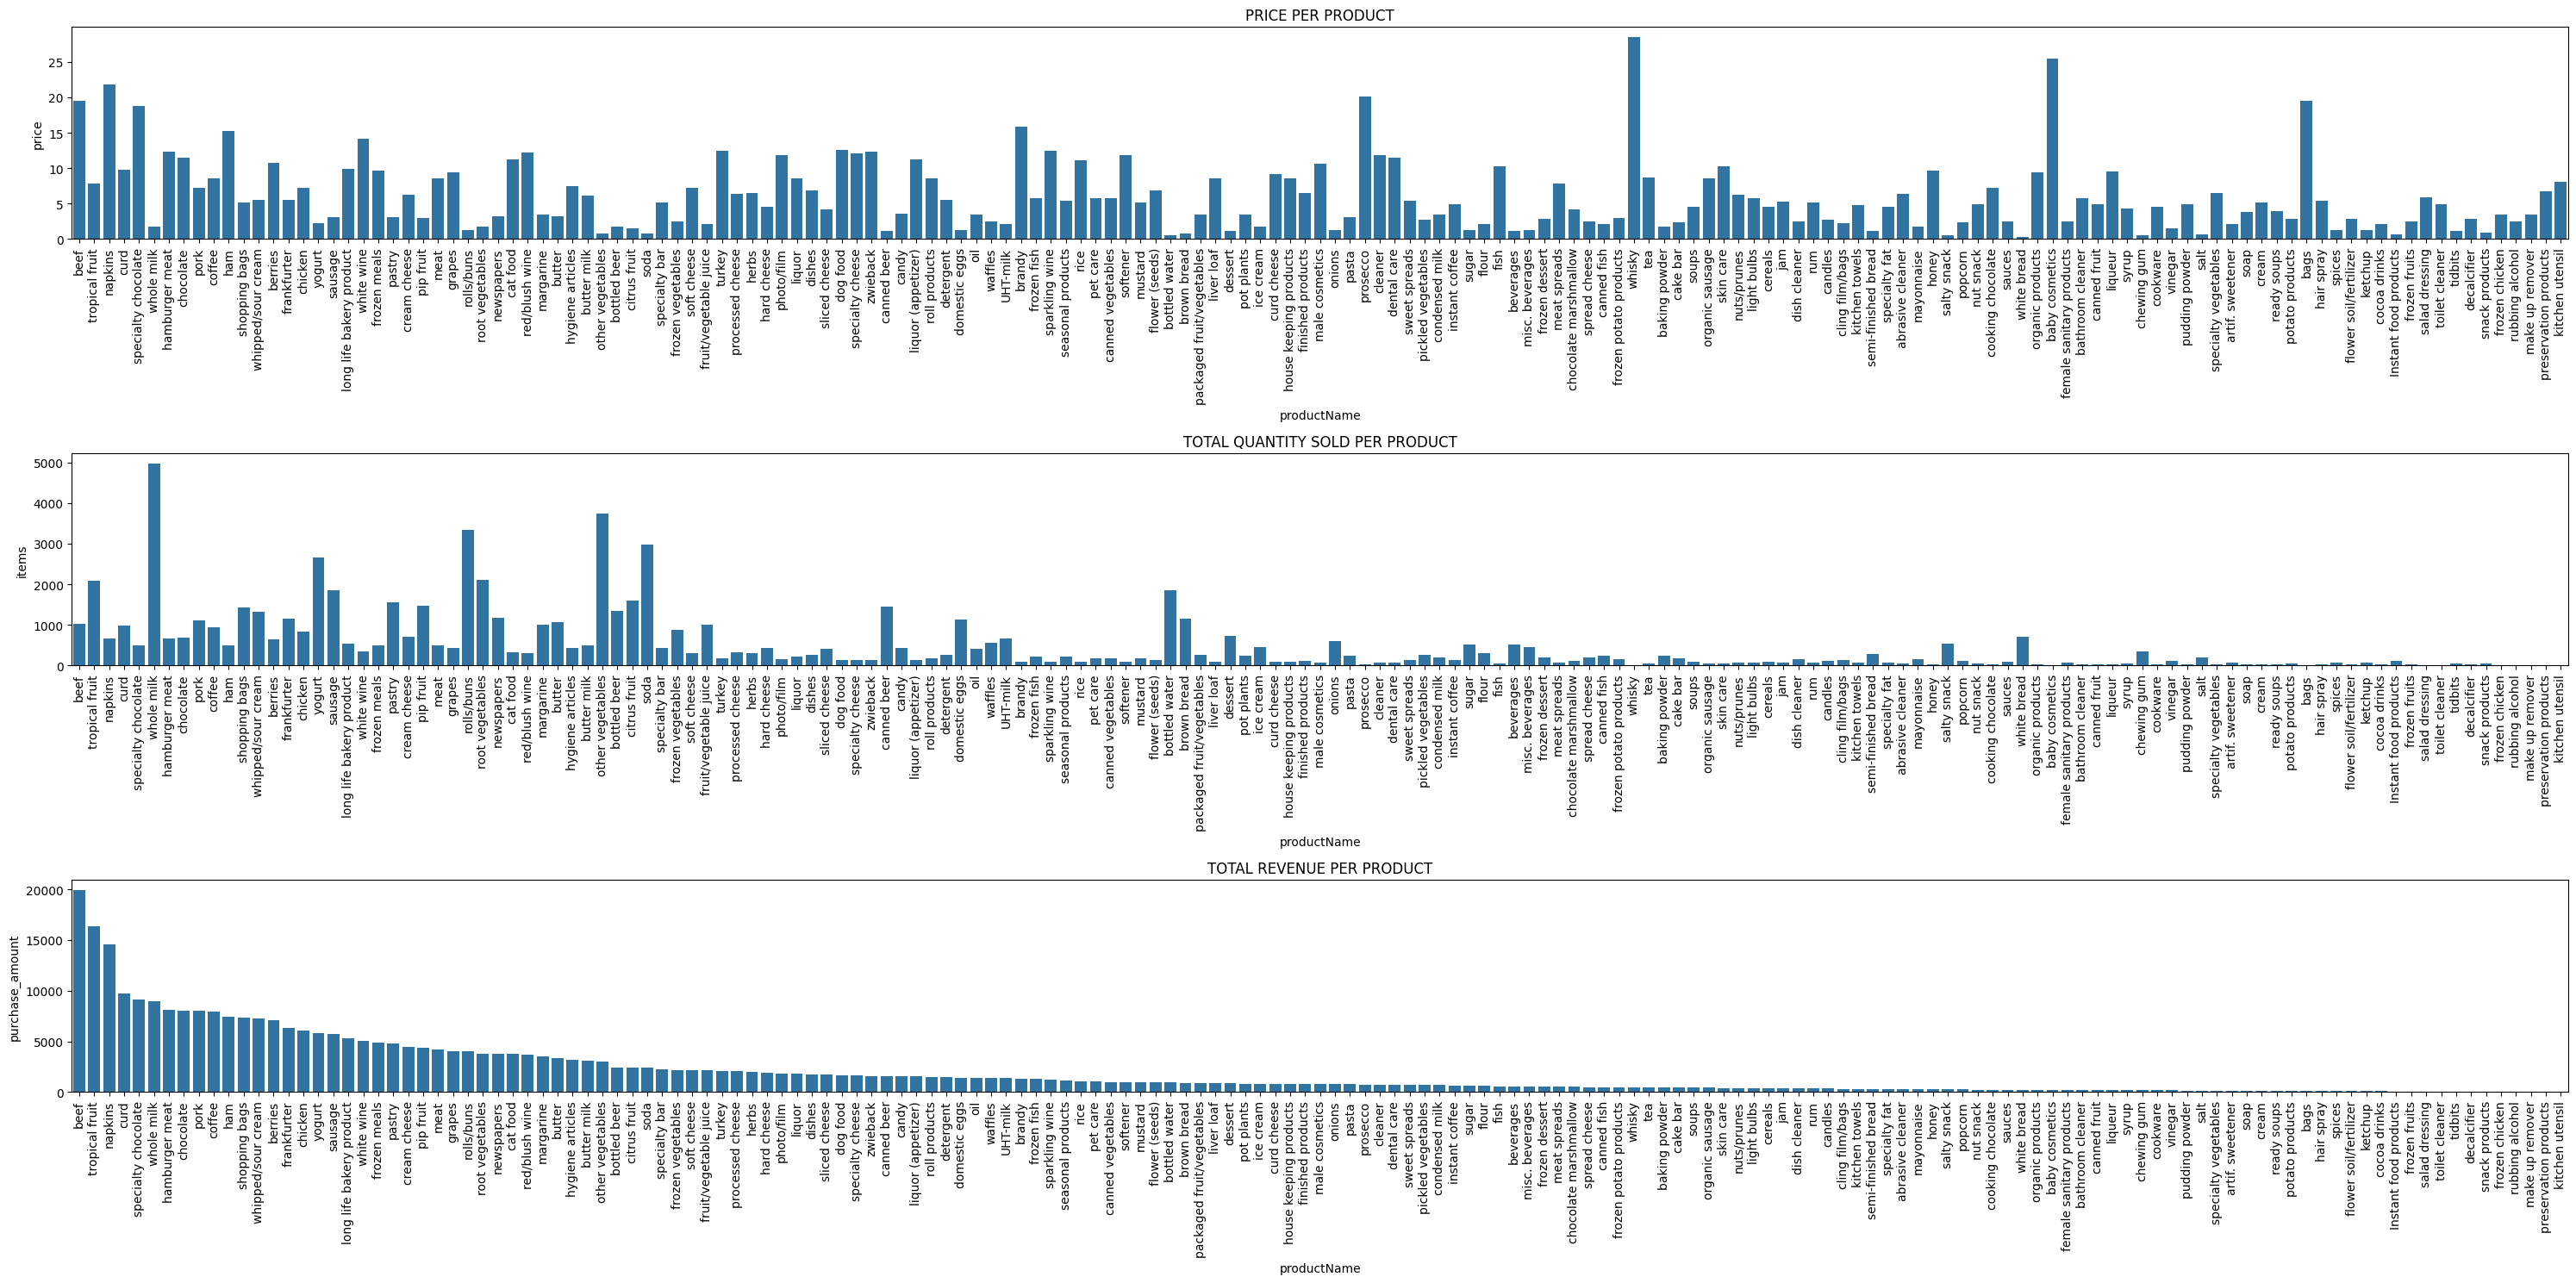

In [28]:
plt.figure(figsize=(30,15))

plt.subplot(3,1,1)
ax1=sns.barplot(data=product, y='price', x='productName')
plt.title('PRICE PER PRODUCT')
plt.xticks(rotation=90)

plt.subplot(3,1,2)
ax2=sns.barplot(data=product, y='items', x='productName')
plt.title('TOTAL QUANTITY SOLD PER PRODUCT')
plt.xticks(rotation=90)

plt.subplot(3,1,3)
ax3=sns.barplot(data=product, y='purchase_amount', x='productName')
plt.title('TOTAL REVENUE PER PRODUCT')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Beef, tropical fruit, napkins, curd, specialty chocolate là các sản phẩm mang lại doanh thu nhiều nhất
- Whole milk, other vegetables, rolls/buns, soda, yogurt là các sản phẩm bán chạy nhất của cửa hàng và doanh thu mà chúng mang lại cũng khá cao
- Frozen chicken, rubbing alcohol, make up remover, preservation products, kitchen utensil là các sản phẩm bán chậm nhất của cửa hàng.

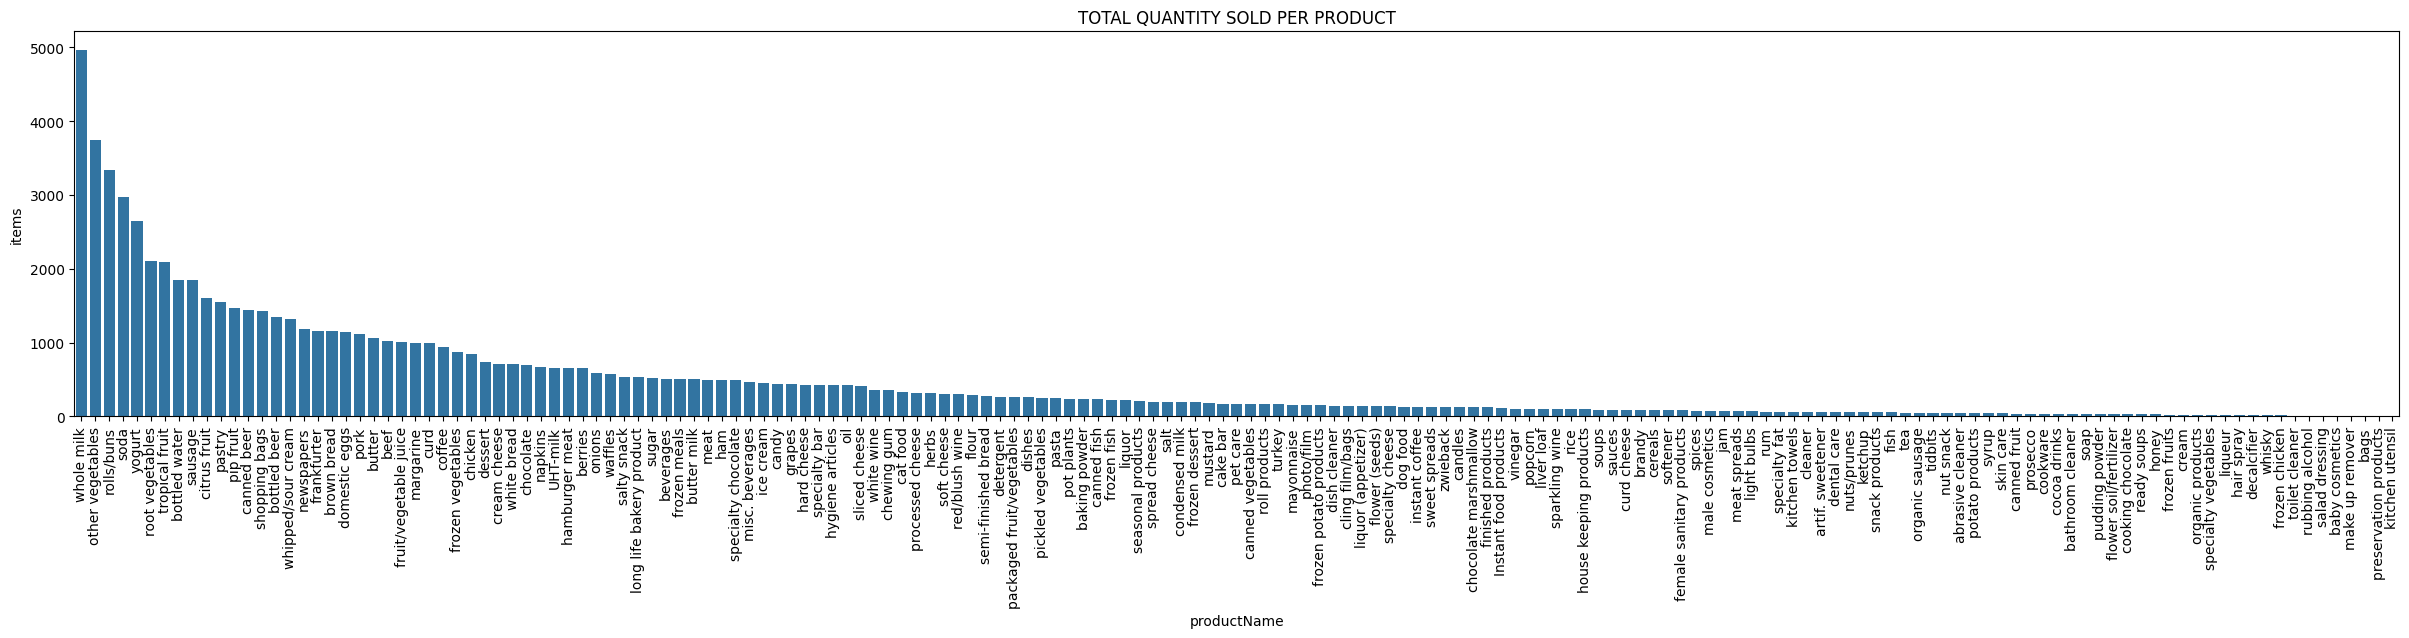

In [29]:
plt.figure(figsize=(30,5))
sns.barplot(data=product_item, y='items', x='productName')
plt.title('TOTAL QUANTITY SOLD PER PRODUCT')
plt.xticks(rotation=90)
plt.show()

#### Category Analysis

In [30]:
category = df[['Category','items','purchase_amount']].groupby('Category').sum().sort_values(by='purchase_amount', ascending=False)
category['percent_amount'] = category['purchase_amount']/sum(category['purchase_amount'])*100
category

,items,purchase_amount,percent_amount
Category,,,
Fresh Food,22786,117566.20,35.526024
Dairy,14968,55748.24,16.845941
Bakery & Sweets,11796,41780.78,12.625270
Household & Hygiene,4339,35555.16,10.744019
Beverages,11963,35391.10,10.694443
Frozen & Processed Food,3689,14371.92,4.342891
Pantry Staples,3134,9857.45,2.978713
Specialty & Seasonal,2360,8864.30,2.678604
Pet Care,641,6425.80,1.941741


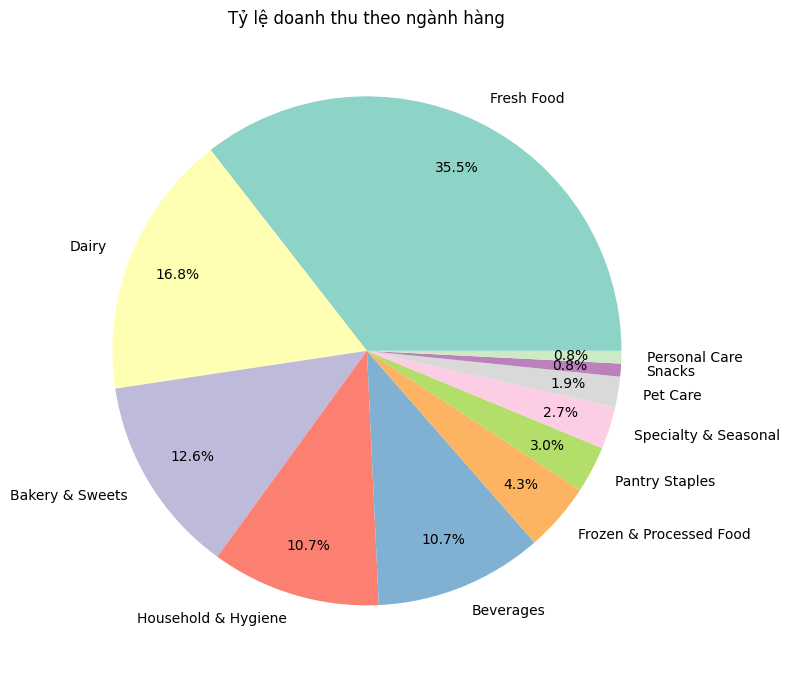

In [31]:
plt.figure(figsize=(8,8))
plt.pie(category['purchase_amount'], labels=category.reset_index()['Category'], autopct='%1.1f%%', pctdistance=0.8, colors=sns.color_palette("Set3", len(category)))
plt.title('Tỷ lệ doanh thu theo ngành hàng')
plt.tight_layout()
plt.show()

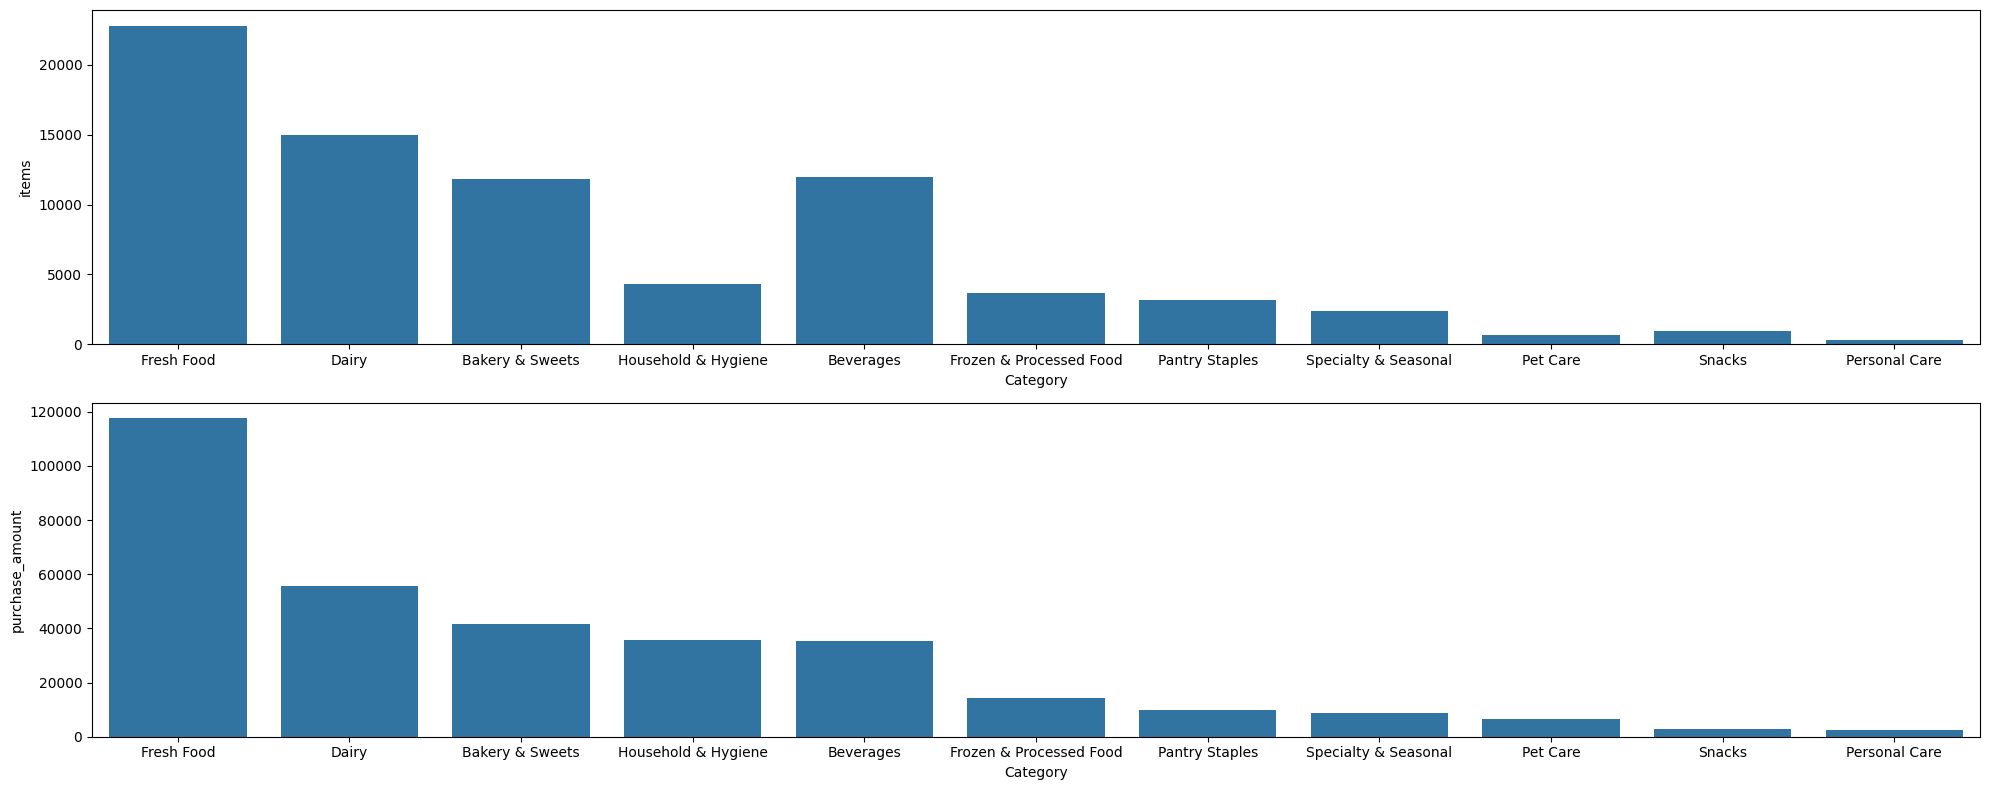

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))
sns.barplot(data=category, x='Category', y='items', ax=axes[0])
sns.barplot(data=category, x='Category', y='purchase_amount', ax=axes[1])
plt.tight_layout()
plt.show()

- Fresh Food, Dairy, Bakery & Sweets là 3 ngành hàng bán chạy nhất và đóng góp hơn 60% doanh thu cửa hàng, trong đó Fresh Food đóng góp 1/3 doanh thu
- Pet Care, Snacks, Personal Care là các ngành hàng bán chậm nhất của cửa hàng

#### Customer purchasing behavior

In [33]:
top_customers = df[['Member_number', 'items', 'purchase_amount']].groupby('Member_number').sum().sort_values(by='purchase_amount', ascending=False)
top_customers

,items,purchase_amount
Member_number,,
2193,63,361.45
1793,52,345.10
3289,63,334.15
2433,57,316.81
2743,41,312.46
...,...,...
1560,5,1.90
1221,2,1.70
4029,2,1.60


- Nhận xét: KH 2193 là người chi tiêu nhiều nhất với 63 sản phẩm tương ứng tổng số tiền là 361.45

#### Number of Sales Weekly

In [34]:
sales_weekly = df.resample('w', on='Date').size()
fig = px.line(df, x=sales_weekly.index, y=sales_weekly,
              labels={'y': 'Number of Sales',
                      'x': 'Date'})
fig.update_layout(title_text='Number of Sales Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

#### Number of Customers Weekly

In [35]:
unique_customer_weekly = df.resample('w', on='Date').Member_number.nunique()
fig = px.line(unique_customer_weekly, x=unique_customer_weekly.index, y=unique_customer_weekly,
              labels={'y': 'Number of Customers'})
fig.update_layout(title_text='Number of Customers Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

#### Sales per Customer Weekly

In [36]:
sales_per_customer = sales_weekly / unique_customer_weekly
fig = px.line(sales_per_customer, x=sales_per_customer.index, y=sales_per_customer,
              labels={'y': 'Sales per Customer Ratio'})
fig.update_layout(title_text='Sales per Customer Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.update_yaxes(rangemode="tozero")
fig.show()

- Nhận xét :
-- Biểu đồ tổng doanh thu theo tuần có sự biến động rõ rệt. Một trong những nguyên nhân có thể đến từ lượng khách hàng đến mua tại cửa hàng không ổn định. Và có thể đến từ thói quen mua sắm dự trữ của người Mỹ, mỗi 1 tuần 2 tuần mới đi siêu thị 1 lần
-- Biểu đồ KH theo tuần có sự tăng giảm liên tục. Nhìn chung, lượng khách năm 2014 có xu hướng tăng nhẹ nhưng sang năm 2015 biểu đồ có xu hướng giảm trở lại. Nguyên nhân được dự đoán do nền kinh tế thế giới vẫn chưa phục hồi sau đợt suy thoái nên lực mua của KH vẫn chưa ổn định. Và cũng có khả năng cửa hàng đã mất đi lượng khách qua đường -> cần xem lại cách bán hàng và có thêm ưu đãi
-- Dù lượng khách hàng đến mua không ổn định, thế nhưng nhìn vào biểu đồ Doanh thu trên từng KH, ta thấy nó vẫn ở xu hướng tăng qua 2 năm. Lượng doanh thu tăng đột biến bắt đầu từ đầu năm 2015 và duy trì ổn định đến hết năm 2015. Có thể thấy rằng tuy lượng khách của cửa hàng không ổn định, thế nhưng cửa hàng vẫn giữ được một lượng khách chính/khách trung thành đóng góp phần lớn doanh thu cho cửa hàng

## RFM

### Create RFM analysis for each customers

In [37]:
# Convert string to date, get max date of dataframe
max_date = df['Date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

# Assuming that each customer went to the store once per specific day
df_RFM = df.groupby('Member_number').agg(Recency=('Date', Recency),
                                         Frequency=('Date', Frequency),
                                         Monetary=('purchase_amount', Monetary))\
                                    .sort_values(by='Monetary', ascending=False)

df_RFM.head()

,Recency,Frequency,Monetary
Member_number,,,
2193,91,11,361.45
1793,26,10,345.10
3289,4,10,334.15
2433,3,7,316.81
2743,142,7,312.46


In [38]:
df_RFM.describe()

,Recency,Frequency,Monetary
count,3898.000000,3898.000000,3898.000000
mean,187.701385,3.838635,84.897332
std,159.912688,1.883678,55.347995
min,0.000000,1.000000,1.100000
25%,57.000000,2.000000,43.570000
50%,141.000000,4.000000,74.755000
75%,280.000000,5.000000,114.975000
max,727.000000,11.000000,361.450000


In [39]:
df_RFM.shape

(3898, 3)

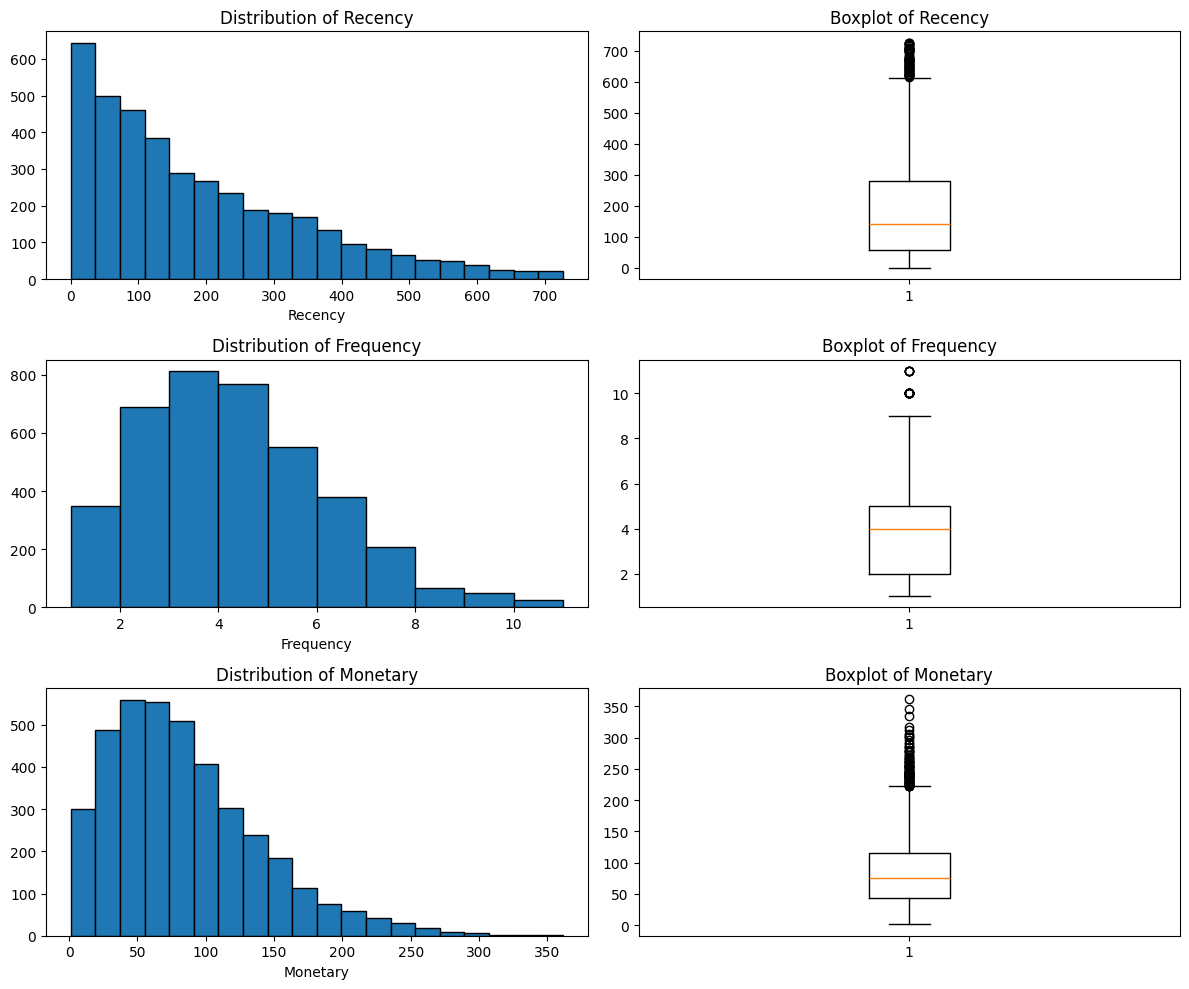

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Histogram
axs[0, 0].hist(df_RFM['Recency'], bins=20, edgecolor='black')
axs[0, 0].set_title('Distribution of Recency')
axs[0, 0].set_xlabel('Recency')

axs[1, 0].hist(df_RFM['Frequency'], bins=10, edgecolor='black')
axs[1, 0].set_title('Distribution of Frequency')
axs[1, 0].set_xlabel('Frequency')

axs[2, 0].hist(df_RFM['Monetary'], bins=20, edgecolor='black')
axs[2, 0].set_title('Distribution of Monetary')
axs[2, 0].set_xlabel('Monetary')

# Boxplot
axs[0, 1].boxplot(df_RFM['Recency'])
axs[0, 1].set_title('Boxplot of Recency')

axs[1, 1].boxplot(df_RFM['Frequency'])
axs[1, 1].set_title('Boxplot of Frequency')

axs[2, 1].boxplot(df_RFM['Monetary'])
axs[2, 1].set_title('Boxplot of Monetary')

plt.tight_layout()
plt.show()

- Recency : Biểu đồ lệch phải, phần lớn khách hàng đã mua hàng 5 tháng gần đây, và số lượng khách hàng giảm dần khi thời gian mua hàng càng xa
- Frequency : Biểu đồ cho thấy phân phối gần như chuẩn, với đỉnh tập trung ở khoảng 2-6 lần mua hàng
- Monetary : Biểu đồ lệch phải, phần lớn khách hàng chi dưới 100$, và số lượng khách hàng chi nhiều hơn sẽ giảm dần.

#### Scale RFM

In [40]:
scaler=RobustScaler()
df_RFM_scaled = pd.DataFrame(scaler.fit_transform(df_RFM), columns=df_RFM.columns)
df_RFM_scaled.head()

,Recency,Frequency,Monetary
0,-0.224215,2.333333,4.015055
1,-0.515695,2.000000,3.786079
2,-0.614350,2.000000,3.632729
3,-0.618834,1.000000,3.389889
4,0.004484,1.000000,3.328969


#### Remove outliers RFM

In [41]:
def remove_outliers (df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
  Q1=df[column_name].quantile(lower_percentile)
  Q3=df[column_name].quantile(upper_percentile)
  IQR=Q3-Q1
  lower_bound=Q1-threshold*IQR
  upper_bound=Q3+threshold*IQR
  df_clean=df.drop(index=df[(df[column_name]<lower_bound) | (df[column_name]>upper_bound)].index)
  return df_clean

df_RFM_clean = df_RFM.copy()

for col in df_RFM.columns:
    df_RFM_clean = remove_outliers(df_RFM_clean, col)

df_RFM_clean.shape

(3713, 3)

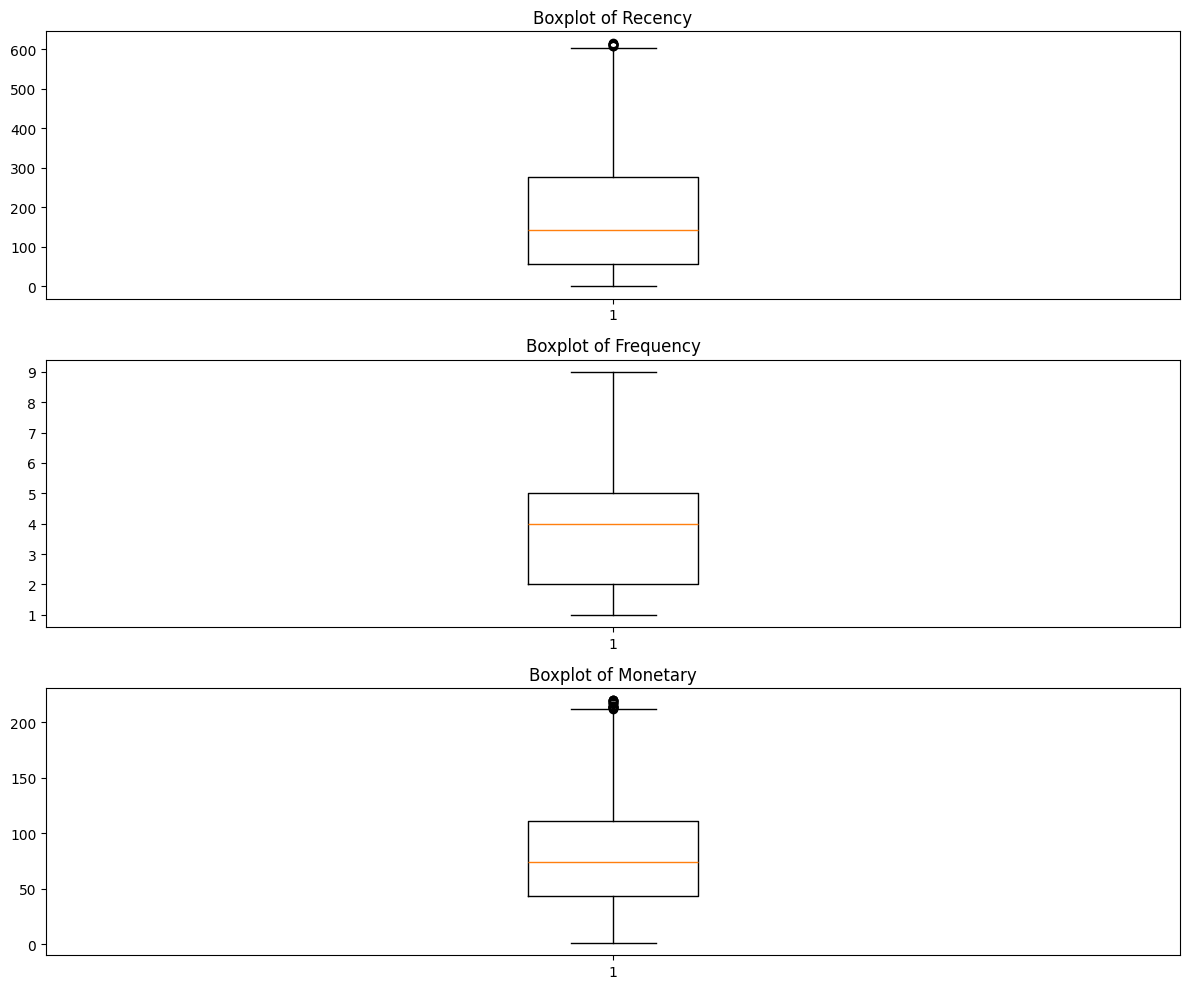

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Boxplot
axs[0].boxplot(df_RFM_clean['Recency'])
axs[0].set_title('Boxplot of Recency')

axs[1].boxplot(df_RFM_clean['Frequency'])
axs[1].set_title('Boxplot of Frequency')

axs[2].boxplot(df_RFM_clean['Monetary'])
axs[2].set_title('Boxplot of Monetary')

plt.tight_layout()
plt.show()

### Calculate RFM quintiles

In [43]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

# Assign these labels to 5 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=5, labels=r_labels)
f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=5, labels=f_labels)
m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=5, labels=m_labels)

# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
2193,91,11,361.45,4,5,5
1793,26,10,345.10,5,5,5
3289,4,10,334.15,5,5,5
2433,3,7,316.81,5,5,5
2743,142,7,312.46,3,5,5


### Concat RFM quintile values to create RFM Segments

In [44]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Member_number,,,,,,,
2193,91,11,361.45,4,5,5,455
1793,26,10,345.10,5,5,5,555
3289,4,10,334.15,5,5,5,555
2433,3,7,316.81,5,5,5,555
2743,142,7,312.46,3,5,5,355


### Count number of unique segments

In [45]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

120


- Phương pháp Concatenate cho ra 120 phân khúc khách hàng khác nhau, không khả thi nên cần tìm cách tiếp cận khác

### Calculate RFM score and level

In [46]:
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Member_number,,,,,,,,
2193,91,11,361.45,4,5,5,455,14
1793,26,10,345.10,5,5,5,555,15
3289,4,10,334.15,5,5,5,555,15
2433,3,7,316.81,5,5,5,555,15
2743,142,7,312.46,3,5,5,355,13


## RFM + KMeans

#### Original data

In [41]:
df_kmeans = df_RFM[['Recency','Frequency','Monetary']]
df_kmeans.head()

,Recency,Frequency,Monetary
Member_number,,,
2193,91,11,361.45
1793,26,10,345.10
3289,4,10,334.15
2433,3,7,316.81
2743,142,7,312.46


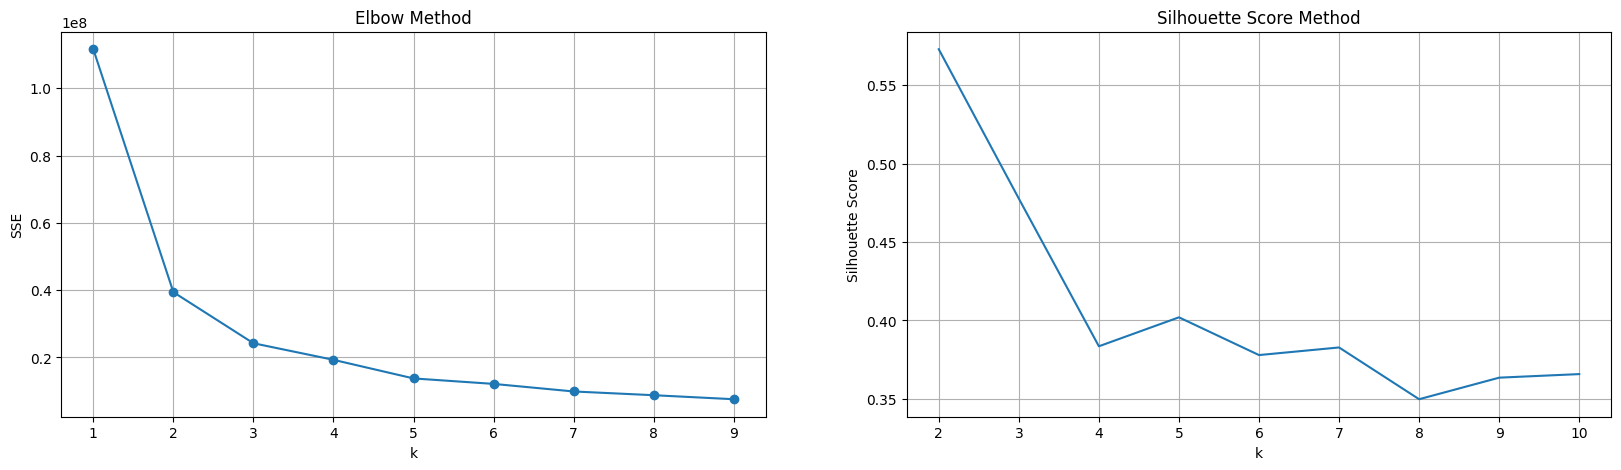

In [42]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("SSE")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_kmeans, labels, metric = 'euclidean'))
plt.plot(range(2,kmax + 1), sil);
plt.title('Silhouette Score Method')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

##### TH1: Chọn k=2 theo (Elbow method) và độ đo Sihoutte cao nhất

In [43]:
# Build model with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_kmeans)
kmeans.labels_.shape

(3898,)

In [44]:
df_kmeans["Cluster"] = kmeans.labels_
df_kmeans.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        395.73      2.72    56.26  1153
1        100.32      4.31    96.93  2745

In [45]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_kmeans.groupby('Cluster').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,396.0,3.0,56.0,1153,29.58
1,Cluster 1,100.0,4.0,97.0,2745,70.42


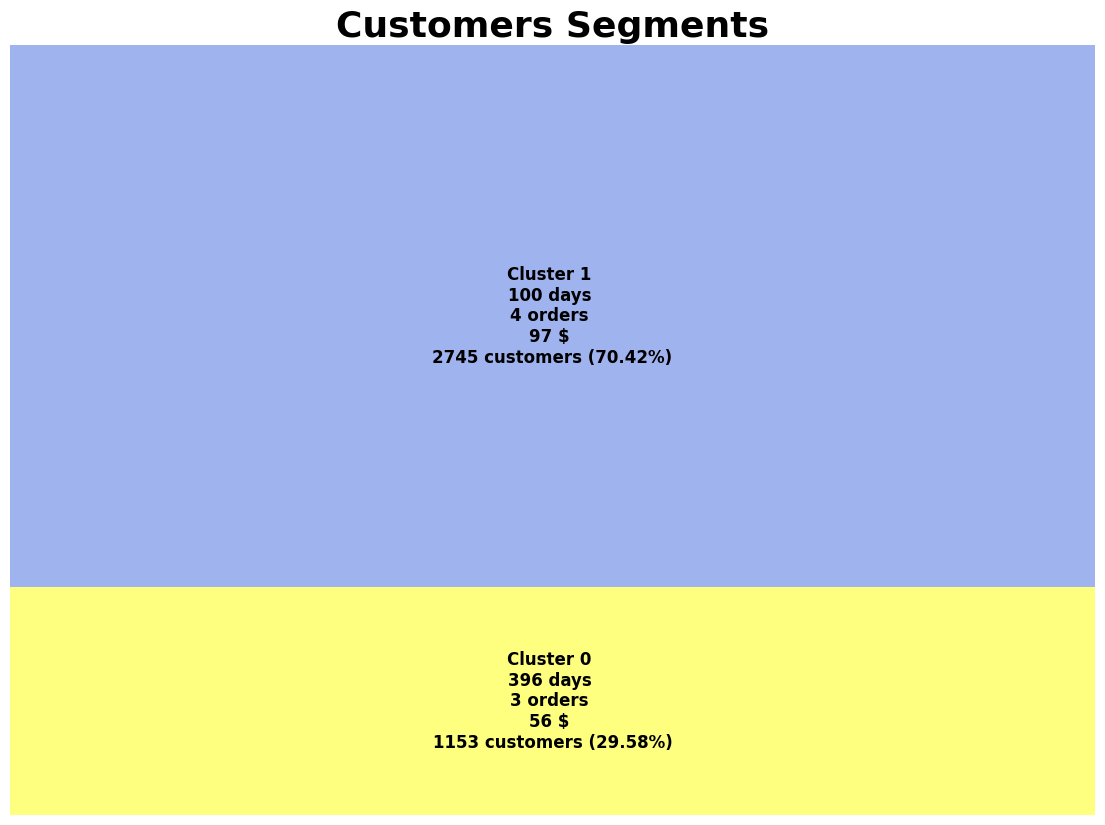

In [52]:
# Treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

In [53]:
# Scatter plot
fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

- Cluster 1 (chiếm 70%) : với tần suất mua sắm trung bình 6 lần, chi tiêu lớn (97) và lần mua gần nhất cách thời gian ghi nhận dữ liệu 3 tháng => Là nhóm khách hàng trung thành và hoạt động tích cực nhất
- Cluster 0 (chiếm 30%) : với chỉ 3 lần mua hàng nhưng cách thời gian ghi nhận dữ liệu là hơn 1 năm, chi tiêu thấp (56) => Là nhóm khách hàng có mức độ tương tác rất thấp, đã không mua hàng trong một thời gian dài và cũng không chi tiêu nhiều.

In [54]:
sil_kmeans=silhouette_score(df_kmeans[["Recency", "Monetary", "Frequency"]].values, kmeans.labels_, metric = 'euclidean')
print("Độ đo Silhoutte Score của KMeanns:", sil_kmeans)

Độ đo Silhoutte Score của KMeanns: 0.5729328376442179


2 cụm sẽ không phản ánh được đặc điểm của khách hàng, nên chia nhiều cụm hơn

##### TH2: k=5 vì tại đó chỉ số SSE bắt đầu chậm lại đáng kể và độ đo Sihoutte vẫn khá tốt

In [46]:
# Build model with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_kmeans)
kmeans.labels_.shape

(3898,)

In [47]:
df_kmeans["Cluster"] = kmeans.labels_
df_kmeans.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        191.62      3.69    78.39  1077
1        560.04      1.93    37.18   301
2         63.46      6.15   175.56   601
3         55.27      3.82    71.35  1204
4        352.49      2.94    61.39   715

In [48]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_kmeans.groupby('Cluster').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'Monetary': ['mean', 'count', 'sum']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Quantity', 'Total_Revenue']
rfm_agg2['Percent_Quantity'] = round((rfm_agg2['Quantity']/rfm_agg2.Quantity.sum())*100, 2)
rfm_agg2['Percent_Revenue'] = round((rfm_agg2['Total_Revenue']/rfm_agg2.Total_Revenue.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change the Cluster Columns Datatype into discrete values, and name segments
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

rfm_agg2['Cluster'] = ['Potential', 'Lost', 'Hardcore', 'Loyal', 'At Risk']

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Quantity,Total_Revenue,Percent_Quantity,Percent_Revenue
0,Potential,192.0,4.0,78.0,1077,84426.0,27.63,25.51
1,Lost,560.0,2.0,37.0,301,11193.0,7.72,3.38
2,Hardcore,63.0,6.0,176.0,601,105510.0,15.42,31.88
3,Loyal,55.0,4.0,71.0,1204,85906.0,30.89,25.96
4,At Risk,352.0,3.0,61.0,715,43895.0,18.34,13.26


KeyError: 'Count'

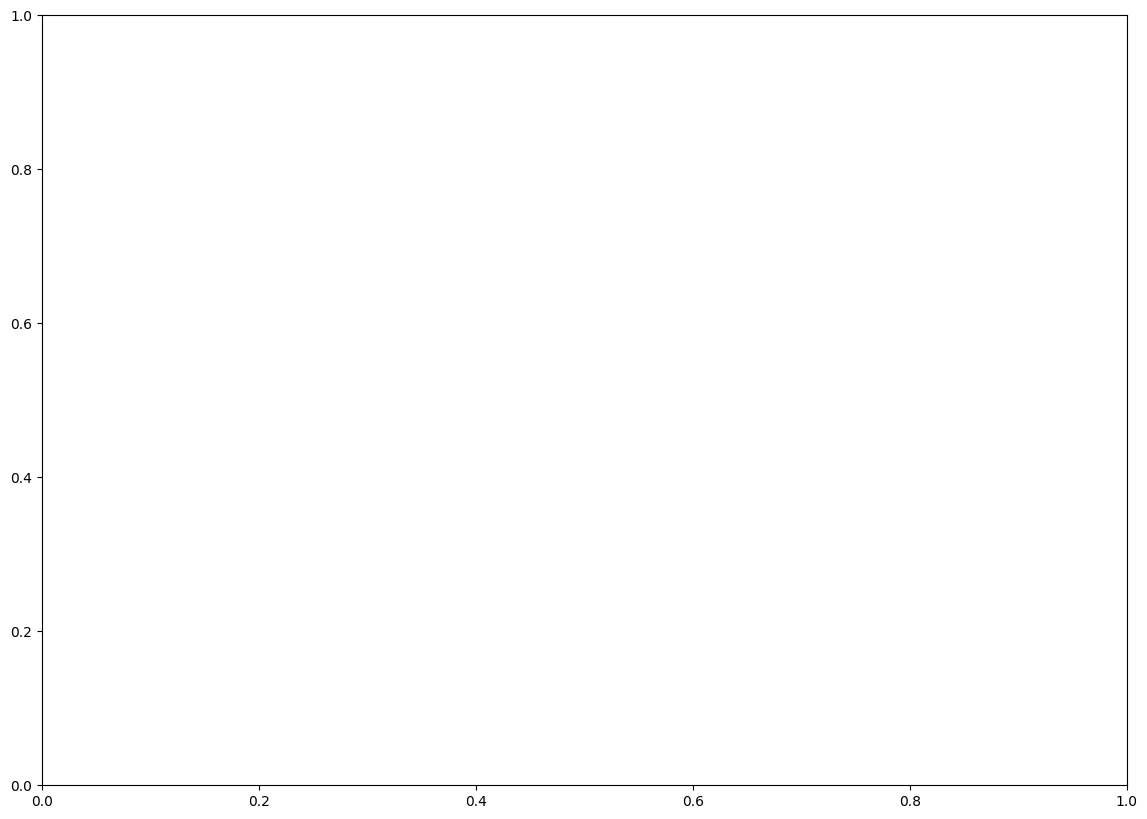

In [49]:
# Treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Potential':'yellow','Lost':'royalblue', 'Hardcore':'cyan',
               'Loyal':'red', 'At Risk':'purple'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
# Scatter plot
fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=80)
fig.show()

In [ ]:
sil_kmeans=silhouette_score(df_kmeans[["Recency", "Monetary", "Frequency"]].values, kmeans.labels_, metric = 'euclidean')
print("Độ đo Silhoutte Score của KMeanns (5 cụm):", sil_kmeans)

Độ đo Silhoutte Score của KMeanns (5 cụm): 0.40201931399947916


- Cluster 2 (chiếm 15%) : với tần suất mua sắm trung bình 6 lần, chi tiêu lớn nhất (176) và lần mua gần nhất cách thời gian ghi nhận dữ liệu 2 tháng => Là nhóm khách hàng mang lại doanh thu lớn nhất cho cửa hàng khi mua hàng thường xuyên và chi tiêu rất nhiều (HARDCORE)
- Cluster 3 (chiếm 31%) : với tần suất mua sắm trung bình 4 lần, chi tiêu lớn (71) và lần mua gần nhất cách thời gian ghi nhận dữ liệu dưới 2 tháng => Là nhóm khách hàng mua hàng thường xuyên (LOYAL)
- Cluster 0 (chiếm 28%) : với tần suất mua sắm trung bình 4 lần, chi tiêu trung bình (78) và lần mua gần nhất cách thời gian ghi nhận dữ liệu 6 tháng => Là nhóm khách hàng tiềm năng (POTENTIAL)
- Cluster 4 (chiếm 18%) : với tần suất mua sắm trung bình 3 lần, chi tiêu thấp (61) và lần mua gần nhất cách thời gian ghi nhận dữ liệu 1 năm => Là nhóm khách hàng có nguy cơ rời bỏ cửa hàng khi đã lâu không mua hàng và giá trị mua hàng cũng không cao (AT RISK)
- Cluster 3 (chiếm 8%) : với tần suất mua sắm trung bình 2 lần, chi tiêu rất thấp (37) và lần mua gần nhất cách thời gian ghi nhận dữ liệu hơn 1.5 năm => Là nhóm khách hàng không còn tương tác với cửa hàng và giá trị mua hàng rất thấp (LOST)

In [105]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print('Saved model!')

Saved model!


In [50]:
rfm_segments=rfm_agg2.copy()
rfm_segments.drop(['Quantity', 'Total_Revenue'], axis=1, inplace=True)
rfm_segments.head()

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Percent_Quantity,Percent_Revenue
0,Potential,192.0,4.0,78.0,27.63,25.51
1,Lost,560.0,2.0,37.0,7.72,3.38
2,Hardcore,63.0,6.0,176.0,15.42,31.88
3,Loyal,55.0,4.0,71.0,30.89,25.96
4,At Risk,352.0,3.0,61.0,18.34,13.26


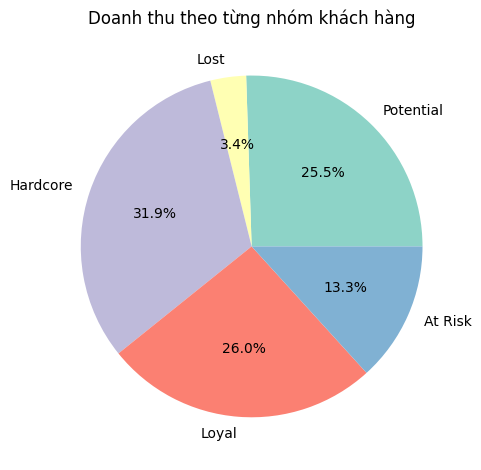

In [52]:
plt.pie(rfm_segments['Percent_Revenue'], labels=rfm_segments['Cluster'], autopct='%1.1f%%', colors=sns.color_palette("Set3", len(rfm_segments)))
plt.title('Doanh thu theo từng nhóm khách hàng')
plt.tight_layout()
plt.show()

In [85]:
rfm_segments.to_csv('rfm_segments.csv', index=False)
print('Saved RFM Segment File!')

Saved RFM Segment File!


In [90]:
df_segments=df_kmeans.copy()
cluster_map = {
    0: 'Potential',
    1: 'Lost',
    2: 'Hardcore',
    3: 'Loyal',
    4: 'At Risk'
}

df_segments['Segment_Name'] = df_segments['Cluster'].map(cluster_map)
df_segments.drop('Cluster', axis=1, inplace=True)
df_segments.reset_index(inplace=True)
df_segments.head()

,Member_number,Recency,Frequency,Monetary,Segment_Name
0,2193,91,11,361.45,Hardcore
1,1793,26,10,345.10,Hardcore
2,3289,4,10,334.15,Hardcore
3,2433,3,7,316.81,Hardcore
4,2743,142,7,312.46,Hardcore


In [91]:
df_segments.to_csv('df_segments.csv', index=False)
print('Saved DataFrame Segment File!')

Saved DataFrame Segment File!


#### Scale data

In [ ]:
df_kmeans_scaled = df_RFM_scaled.copy()

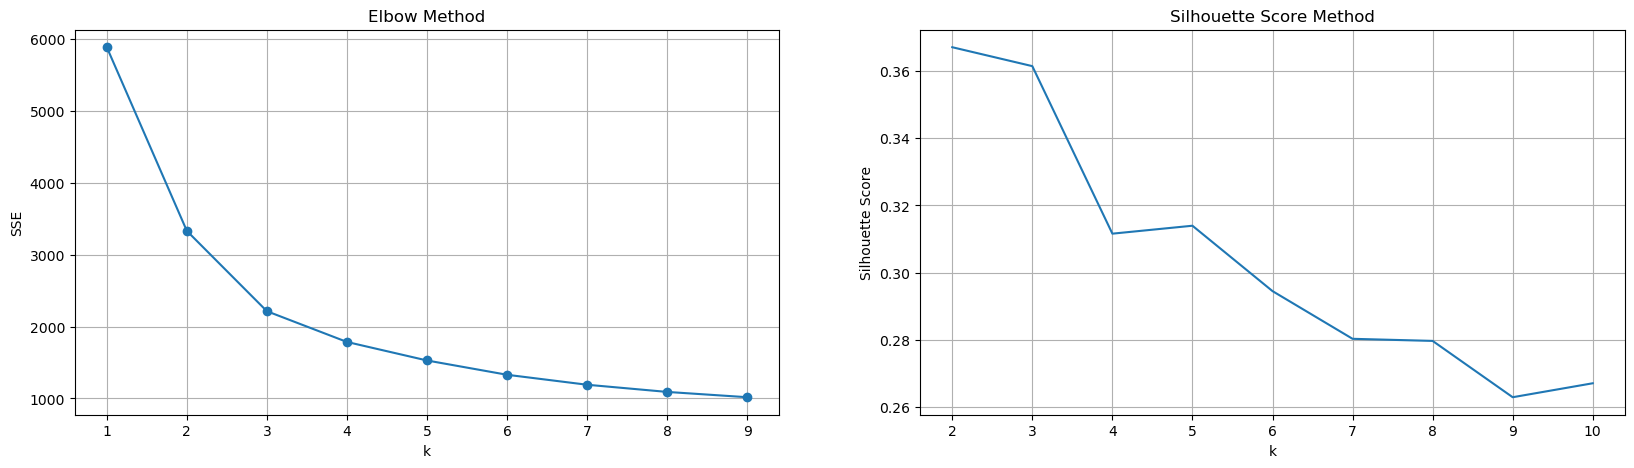

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans_scaled)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("SSE")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_kmeans_scaled, labels, metric = 'euclidean'))
plt.plot(range(2,kmax + 1), sil);
plt.title('Silhouette Score Method')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [ ]:
# Build model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_kmeans_scaled)

df_kmeans_scaled["Cluster"] = kmeans.labels_
df_kmeans_scaled.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean', 'count']}).round(2)

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2_scaled = df_kmeans_scaled.groupby('Cluster').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'Monetary': ['mean', 'count']}).round(0)

rfm_agg2_scaled.columns = rfm_agg2_scaled.columns.droplevel()
rfm_agg2_scaled.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2_scaled['Percent'] = round((rfm_agg2_scaled['Count']/rfm_agg2_scaled.Count.sum())*100, 2)

# Reset the index
rfm_agg2_scaled = rfm_agg2_scaled.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2_scaled['Cluster'] = 'Cluster '+ rfm_agg2_scaled['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2_scaled

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,-0.0,-0.0,-0.0,1854,47.56
1,Cluster 1,1.0,-1.0,-0.0,973,24.96
2,Cluster 2,-0.0,1.0,1.0,1071,27.48


In [ ]:
rfm_agg2_scaled[['RecencyMean', 'FrequencyMean',	'MonetaryMean']]=scaler.inverse_transform(rfm_agg2_scaled[['RecencyMean', 'FrequencyMean',	'MonetaryMean']])
rfm_agg2_scaled

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,141.0,4.0,74.755,1854,47.56
1,Cluster 1,364.0,1.0,74.755,973,24.96
2,Cluster 2,141.0,7.0,146.160,1071,27.48


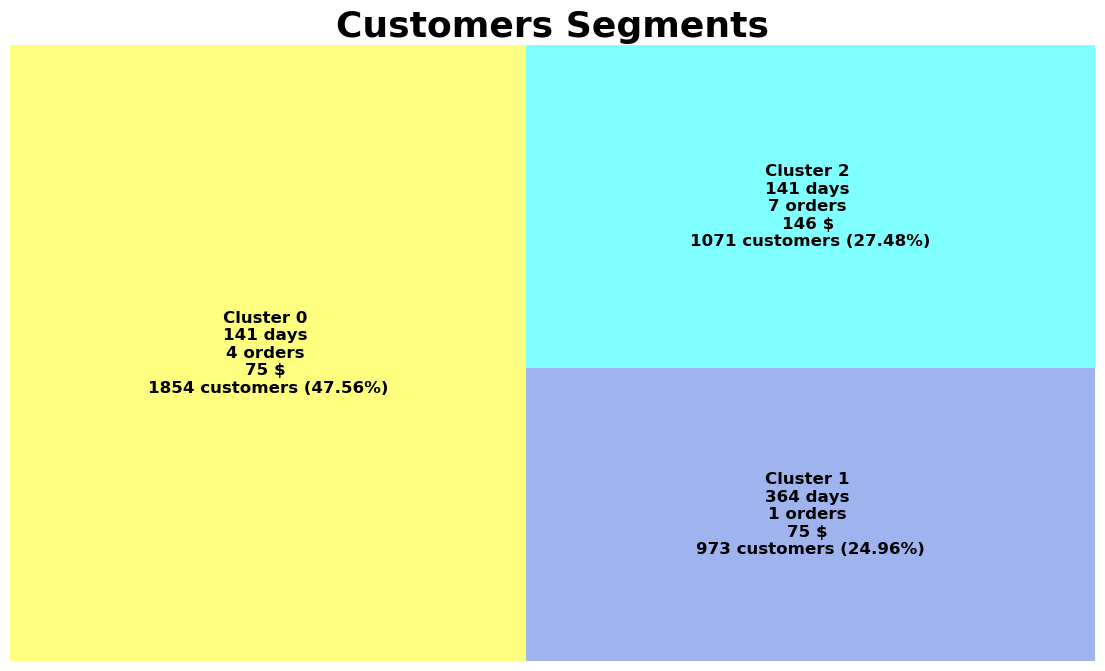

In [ ]:
# Treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 8)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan'}

squarify.plot(sizes=rfm_agg2_scaled['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2_scaled.iloc[i])
                      for i in range(0, len(rfm_agg2_scaled))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
# Scatter plot
fig = px.scatter(rfm_agg2_scaled, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

In [ ]:
sil_kmeans=silhouette_score(df_kmeans_scaled[["Recency", "Monetary", "Frequency"]].values, kmeans.labels_, metric = 'euclidean')
print("Độ đo Silhoutte Score của KMeanns đã scale data (3 cụm):", sil_kmeans)

Độ đo Silhoutte Score của KMeanns đã scale data (3 cụm): 0.3614052751573513


#### Remove outliers data

In [ ]:
df_kmeans_clean = df_RFM_clean.copy()

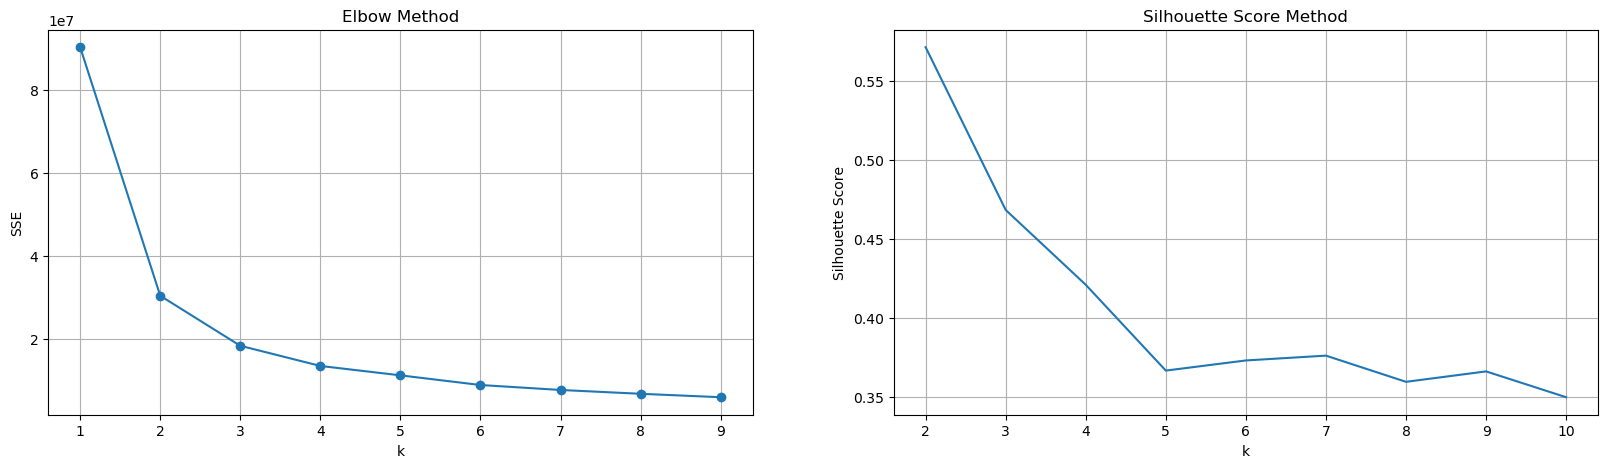

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans_clean)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("SSE")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_kmeans_clean)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_kmeans_clean, labels, metric = 'euclidean'))
plt.plot(range(2,kmax + 1), sil);
plt.title('Silhouette Score Method')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [ ]:
# Build model with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_kmeans_clean)

df_kmeans_clean["Cluster"] = kmeans.labels_
df_kmeans_clean.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean', 'count']}).round(2)

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2_clean = df_kmeans_clean.groupby('Cluster').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'Monetary': ['mean', 'count']}).round(0)

rfm_agg2_clean.columns = rfm_agg2_clean.columns.droplevel()
rfm_agg2_clean.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2_clean['Percent'] = round((rfm_agg2_clean['Count']/rfm_agg2_clean.Count.sum())*100, 2)

# Reset the index
rfm_agg2_clean = rfm_agg2_clean.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2_clean['Cluster'] = 'Cluster '+ rfm_agg2_clean['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2_clean

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,50.0,4.0,97.0,1531,41.23
1,Cluster 1,492.0,2.0,43.0,368,9.91
2,Cluster 2,320.0,3.0,65.0,720,19.39
3,Cluster 3,172.0,4.0,81.0,1094,29.46


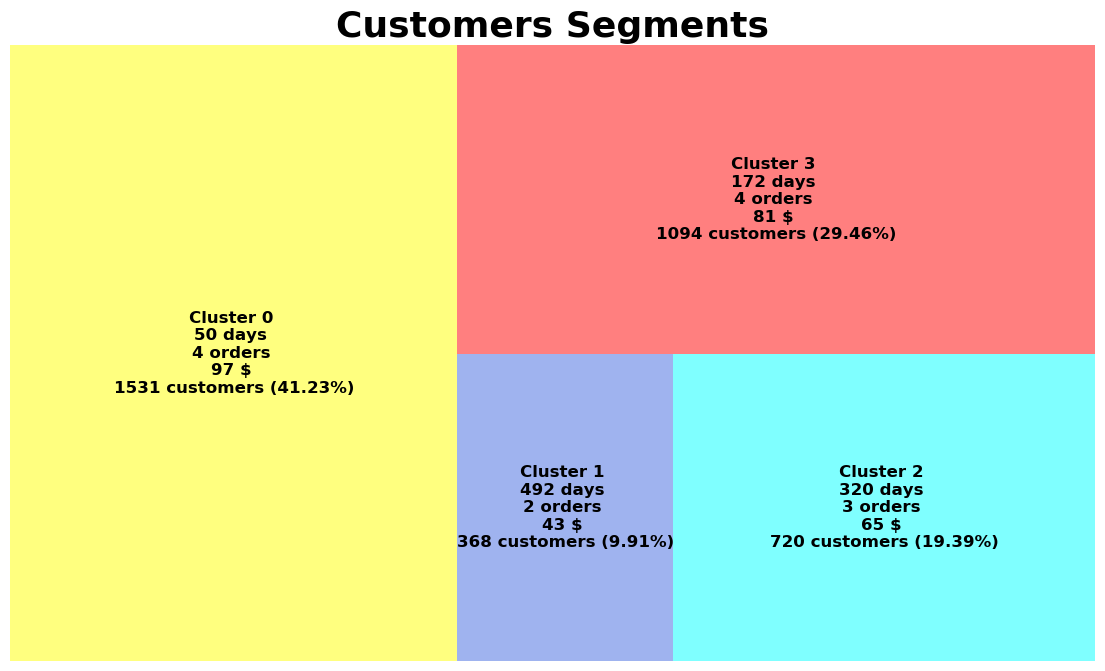

In [ ]:
# Treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 8)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red'}

squarify.plot(sizes=rfm_agg2_clean['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2_clean.iloc[i])
                      for i in range(0, len(rfm_agg2_clean))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
# Scatter plot
fig = px.scatter(rfm_agg2_clean, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

In [ ]:
sil_kmeans=silhouette_score(df_kmeans_clean[["Recency", "Monetary", "Frequency"]].values, kmeans.labels_, metric = 'euclidean')
print("Độ đo Silhoutte Score của KMeanns đã remove outliers (4 cụm):", sil_kmeans)

Độ đo Silhoutte Score của KMeanns đã remove outliers (4 cụm): 0.42110370796715607
